In [1]:
import pandas as pd 
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# The Problem
We need to analyze all the data we have from our client's assets to extract meaningful conclusions. We are looking for an awesome Data Analyst capable of implementing analytics solutions, such as data analysis and visualization tools to understand our client's data, extract it from SQL tables and leverage it to generate marketing insights.

# The Task
Using the resources attached to the email, we want to test your ability to analyze a specific data set and extract useful insights.

Firstly, you will be required to answer a set of questions to aim at the minimum passing grade at this test. These questions are:

- Average Social Media score (smScore) by the publishing year?
- What are the most present colors in assets by publishing year?
- What are the most present colors in assets by asset type?

Once you have answered those, it is time to display your creativity and curiosity to find and communicate any useful additional insights. Consider this second part as a deliverable you will be presenting to a client, in which you have to leverage the data you have been presented with to add value to the analysis. For this reason, in this second section, you will not receive a guiding set of questions, rather we expect you to come forward with ideas.

# Collecting Data

In [2]:
path_asset = 'data' #Informando pasta onde os arquivos .csv estão 
csv_files = glob.glob(path_asset + "/*.csv") #Listando todos os nomes dos arquivos .csv 
list_assets = (pd.read_csv(file, sep=',') for file in csv_files) #Transformando em um gerador de lista de Dataframes

df_assets = list(list_assets)

## Alternative Data Collection by SQL

In [3]:
import sqlite3 as db

conn = db.connect("data/mock_db_v2.db")

df_a = pd.read_sql('SELECT * FROM asset', con=conn)
df_t = pd.read_sql('SELECT * FROM asset_asset_types', con=conn)
df_c = pd.read_sql('SELECT * FROM asset_color', con=conn)
df_at = pd.read_sql('SELECT * FROM asset_type', con=conn)

# Resolução

In [4]:
df_a = df_assets[0] 
df_t = df_assets[1]
df_c = df_assets[2] 
df_at = df_assets[3] 

# Mudanças necessárias:
#1
df_a.publishedAt = pd.to_datetime(df_a.publishedAt)
df_a['p_year'] = df_a.publishedAt.dt.year

#2
df_c.columns = ['c_id', 'c_createdAt', 'c_updatedAt', 'c_assetId', 'c_color', 'c_coverage']
DF_std = pd.merge(df_a, df_c, how = 'outer', left_on = 'id', right_on= 'c_assetId')

#3
id_name = dict(zip(df_at.id,df_at.name))
df_t['id_name'] = df_t.assetTypeId.map(id_name)

parent_id_name = dict(zip(df_at.name,df_at.parentId))
df_t['parent_id_name'] = df_t.id_name.map(parent_id_name)

#4
id_asset_name = dict(zip(df_t.assetId,df_t.id_name))
DF_std['id_asset_type_name'] = DF_std.id.map(id_asset_name)

## Average Social Media score (smScore) by the publishing year?

In [5]:
# Answer:
df_a.groupby(by=df_a.publishedAt.dt.year).smScore.mean().round(2)

publishedAt
2016    53.55
2017    64.89
2018    68.77
2019    66.04
2020    64.92
2021    65.74
2022    64.07
Name: smScore, dtype: float64

## What are the most present colors in assets by publishing year?

In [6]:
# Answer: 3 Most presents
DF_std['c_color'].groupby(DF_std['p_year']).value_counts().groupby('p_year').nlargest(3).droplevel(level=0)

p_year  c_color   
2016    Gray           1
        Green          1
2019    Green         18
        Light Gray    15
        Sienna         9
2020    Light Gray    14
        Green         13
        Gray           8
2021    Green         69
        Gray          53
        Light Gray    52
2022    Green         41
        Light Gray    41
        Gray          34
Name: c_color, dtype: int64

## What are the most present colors in assets by asset type?

In [7]:
# Answer: 3 Most presents
DF_std['c_color'].groupby(DF_std['id_asset_type_name']
                         ).value_counts().groupby('id_asset_type_name').nlargest(3).droplevel(level=0)

id_asset_type_name  c_color   
Facebook            Green           6
                    Light Gray      6
                    Black           5
Instagram           Green         136
                    Light Gray    116
                    Gray          100
Name: c_color, dtype: int64

## Only 2 mimeType colors were extracted:

- DF_std.mimeType.unique()

array(['image/jpeg', 'video/mp4', 'image/png', 
       'video/mov', 'image/webp', 'image/gif'], dtype=object)

- DF_std[DF_std['c_color'].isna() == False].mimeType.unique()

array(['image/jpeg', 'video/mp4'], dtype=object)


# Rascunhos

In [8]:
#### DF_std.parentAssetTypeId == df_at.parentId

#### DF_std.id == df_t.assetId

#### df_t.assetTypeId == df_at.id

def unicos(df):
    lista = []
    for col in list(df.columns):
        q = len(df[col].unique())
        lista.append(q)
    Z = dict(zip(list(df.columns),lista))
    return Z

In [9]:
for i in range(len(df_assets)):
    uni = unicos(df_assets[i])
    print(uni, '\n')

{'name': 739, 'createdAt': 800, 'updatedAt': 600, 'id': 800, 'campaignId': 23, 'sectorId': 14, 'fileType': 2, 'mimeType': 6, 'duration': 16, 'frameCount': 16, 'framesPerSecond': 5, 'brandId': 29, 'oohScore': 602, 'smScore': 138, 'tvcScore': 240, 'widthPx': 132, 'heightPx': 226, 'userId': 6, 'deletedAt': 8, 'status': 2, 'parentAssetTypeId': 3, 'publishedAt': 738, 'scraped': 1, 'p_year': 7} 

{'assetId': 1735, 'assetTypeId': 16, 'id_name': 16, 'parent_id_name': 4} 

{'c_id': 876, 'c_createdAt': 875, 'c_updatedAt': 875, 'c_assetId': 306, 'c_color': 27, 'c_coverage': 668} 

{'id': 18, 'createdAt': 1, 'updatedAt': 2, 'name': 18, 'parentId': 4} 



In [10]:
df_a.shape, df_c.shape, DF_std.shape

((800, 24), (876, 6), (1370, 31))

In [11]:
DF_std.isna().sum() #1370

name                     0
createdAt                0
updatedAt                0
id                       0
campaignId             669
sectorId                 0
fileType                 0
mimeType                 0
duration              1338
frameCount            1338
framesPerSecond       1338
brandId                  0
oohScore                 0
smScore                  0
tvcScore                 0
widthPx                  0
heightPx                 0
userId                   0
deletedAt             1162
status                   0
parentAssetTypeId        0
publishedAt              0
scraped                  0
p_year                   0
c_id                   494
c_createdAt            494
c_updatedAt            494
c_assetId              494
c_color                494
c_coverage             494
id_asset_type_name       0
dtype: int64

In [12]:
id_color = dict(zip(df_c.c_assetId,df_c.c_color))
DF_std['c_color'] = DF_std.id.map(id_color)

In [13]:
#DF_std.c_color.unique()

In [14]:
DF_std.id_asset_type_name.unique() #.iloc[:2,12:]

array(['TV', 'Facebook', 'Instagram', 'Shelf frame', 'TikTok', 'YouTube',
       'External ecommerce platform', 'Brand website', 'Key visual',
       'Stopper', 'Shelf talker', 'Out of Home', 'Google display banners'],
      dtype=object)

In [15]:
lista = []
for col in list(DF_std.columns):
    q = len(DF_std[col].unique())
    lista.append(q)
    
Z = dict(zip(list(DF_std.columns),lista))

"""
Z_linha = dict()
for (key, value) in Z.items():
    if value < 20:
        Z_linha[key] = value
Z_linha
"""
Z

{'name': 739,
 'createdAt': 800,
 'updatedAt': 600,
 'id': 800,
 'campaignId': 23,
 'sectorId': 14,
 'fileType': 2,
 'mimeType': 6,
 'duration': 16,
 'frameCount': 16,
 'framesPerSecond': 5,
 'brandId': 29,
 'oohScore': 602,
 'smScore': 138,
 'tvcScore': 240,
 'widthPx': 132,
 'heightPx': 226,
 'userId': 6,
 'deletedAt': 8,
 'status': 2,
 'parentAssetTypeId': 3,
 'publishedAt': 738,
 'scraped': 1,
 'p_year': 7,
 'c_id': 877,
 'c_createdAt': 876,
 'c_updatedAt': 876,
 'c_assetId': 307,
 'c_color': 25,
 'c_coverage': 669,
 'id_asset_type_name': 13}

In [16]:
#len(set(DF_std[DF_std['c_color'].isna() == True].id).intersection(set(df_c.c_assetId)))
#len(set(DF_std.id).intersection(set(df_c.c_assetId)))
#DF_std.name.str[:6].unique()#[DF_std['c_color'].isna() == False]#.isna().sum()

In [17]:
#df_a.name.str.count("magnum").sum()
"""
lista = []
for col in list(DF_std.columns):
    if type(DF_std[col][0]) == str:
        q = DF_std[col].str.count(df_at.iloc[0,3]).sum()
        lista.append(q)
    else:
        q = 'Not STRING'
        lista.append(q)
lista
"""

"\nlista = []\nfor col in list(DF_std.columns):\n    if type(DF_std[col][0]) == str:\n        q = DF_std[col].str.count(df_at.iloc[0,3]).sum()\n        lista.append(q)\n    else:\n        q = 'Not STRING'\n        lista.append(q)\nlista\n"

# Plots

In [18]:
unicos(DF_std)#.columns

{'name': 739,
 'createdAt': 800,
 'updatedAt': 600,
 'id': 800,
 'campaignId': 23,
 'sectorId': 14,
 'fileType': 2,
 'mimeType': 6,
 'duration': 16,
 'frameCount': 16,
 'framesPerSecond': 5,
 'brandId': 29,
 'oohScore': 602,
 'smScore': 138,
 'tvcScore': 240,
 'widthPx': 132,
 'heightPx': 226,
 'userId': 6,
 'deletedAt': 8,
 'status': 2,
 'parentAssetTypeId': 3,
 'publishedAt': 738,
 'scraped': 1,
 'p_year': 7,
 'c_id': 877,
 'c_createdAt': 876,
 'c_updatedAt': 876,
 'c_assetId': 307,
 'c_color': 25,
 'c_coverage': 669,
 'id_asset_type_name': 13}

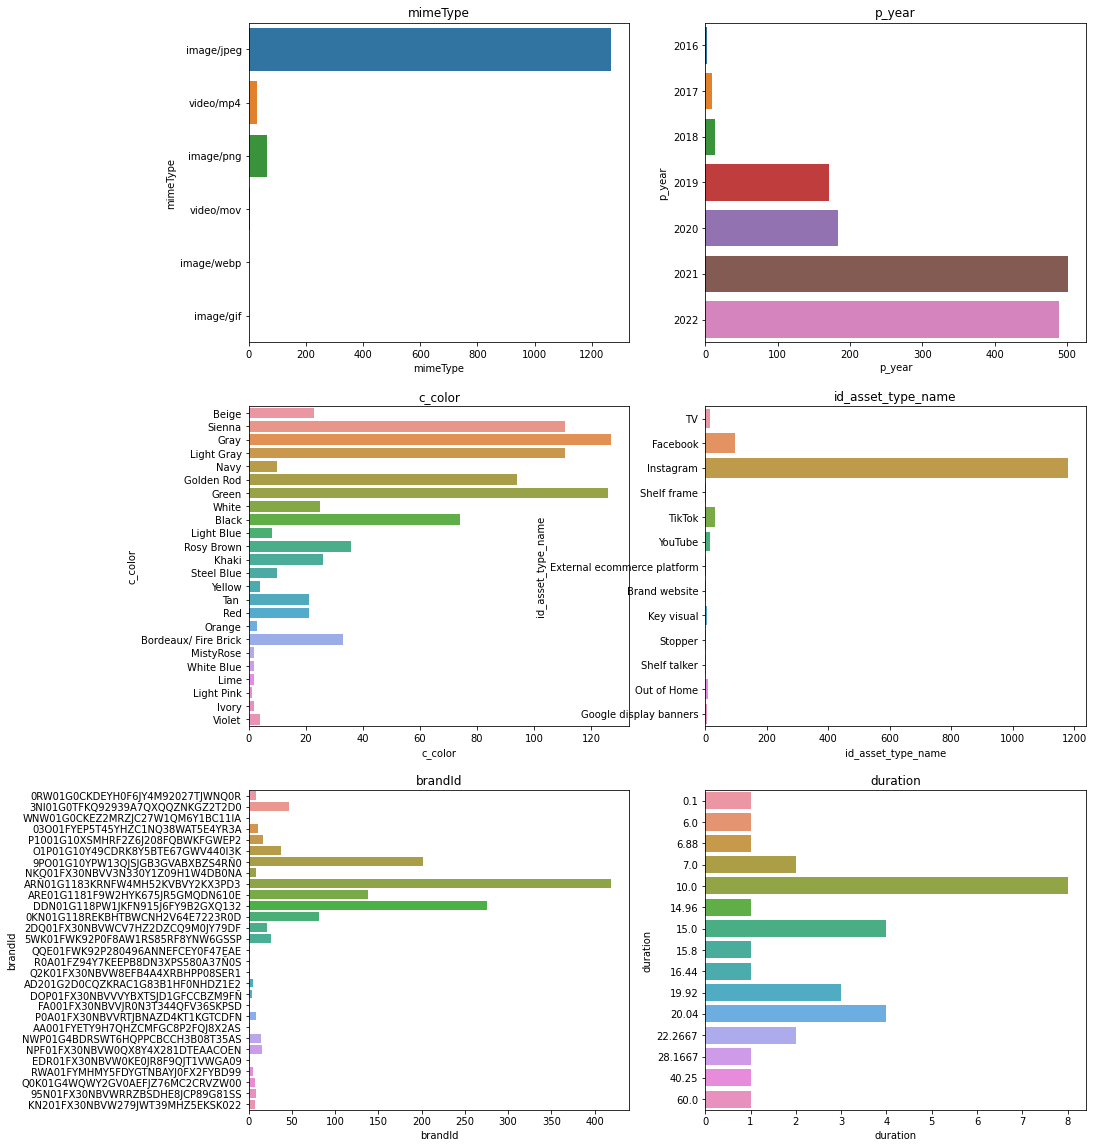

In [26]:

cat_features=['mimeType', 'p_year', 'c_color', 'id_asset_type_name', 'brandId', 'duration']
data = DF_std

plt.figure(figsize=(15,20), facecolor='white')
plotnumber =1
for cat_features in cat_features:
    ax = plt.subplot(3,2,plotnumber)
    sns.countplot(y=cat_features,data=data)
    plt.xlabel(cat_features)
    plt.title(cat_features)
    plotnumber+=1
plt.show()

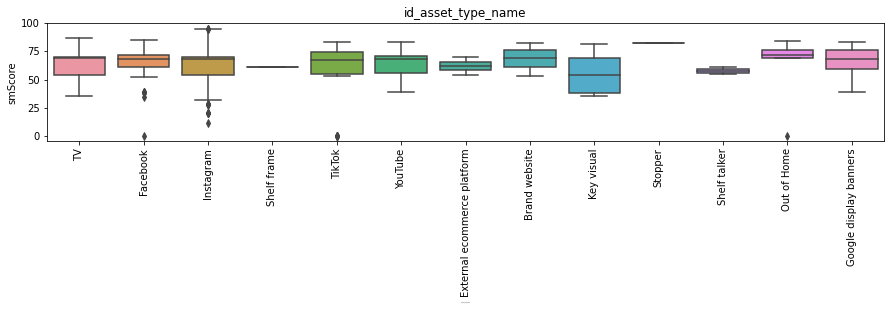

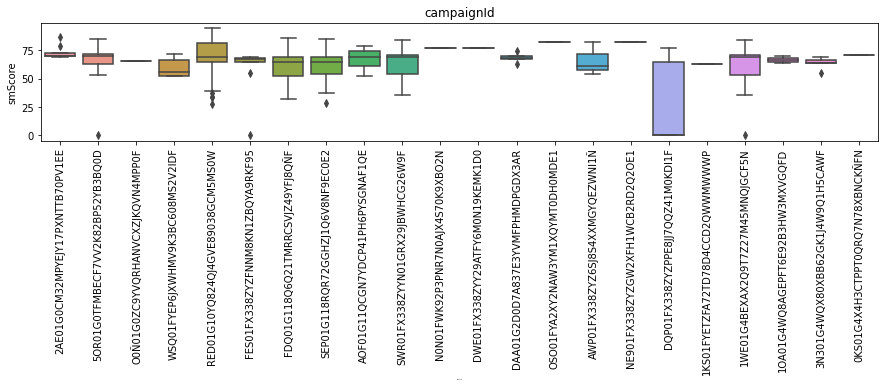

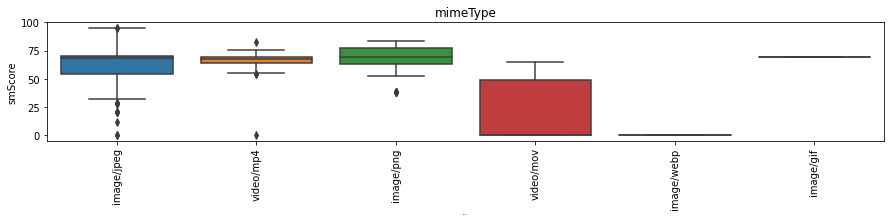

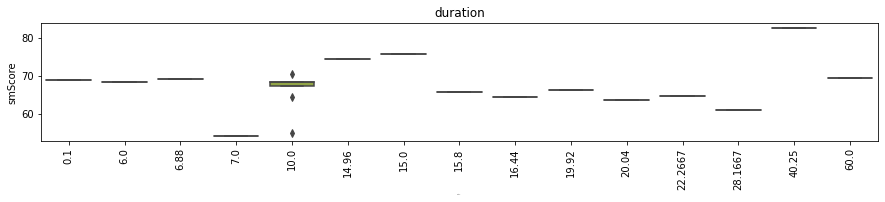

In [24]:
cat_features= ['id_asset_type_name', 'campaignId', 'mimeType', 'duration']#, 'c_color', 'id_asset_type_name']
data = DF_std


plotnumber =1
for cat_f in cat_features:
    plt.figure(figsize=(15,10), facecolor='white')
    ax = plt.subplot(4,1,plotnumber)
    sns.boxplot(y = data.smScore, x = data[cat_f])
    plt.xlabel(cat_f, fontsize=1)
    plt.title(cat_f) 
    plt.xticks(rotation = 90)
    ax.yaxis.label.set_size(10)
    plotnumber+=1
    plt.show()

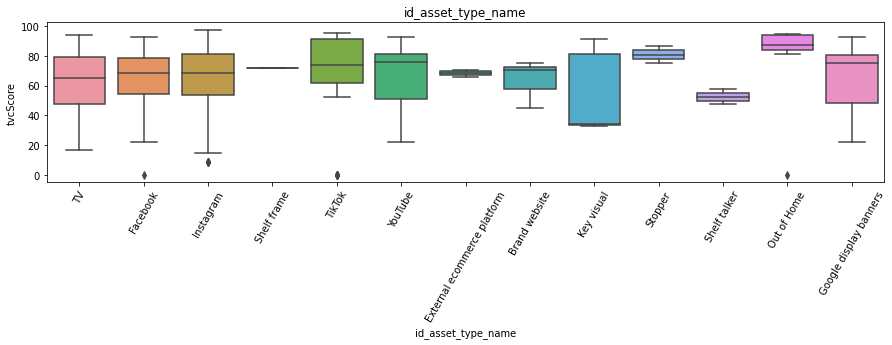

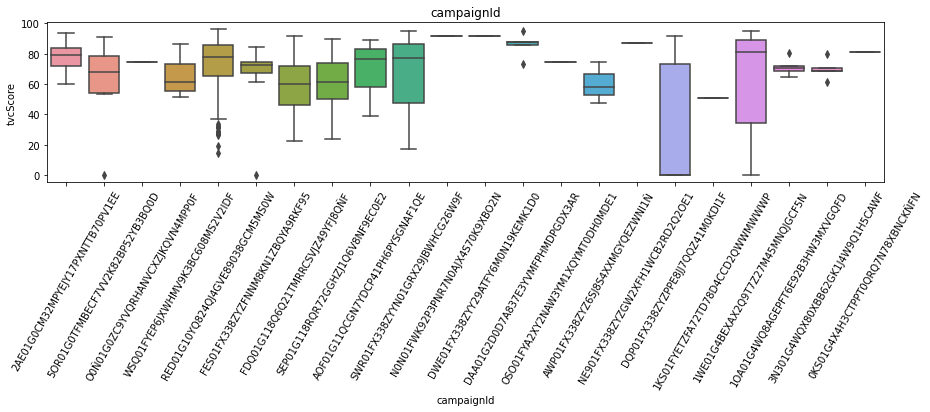

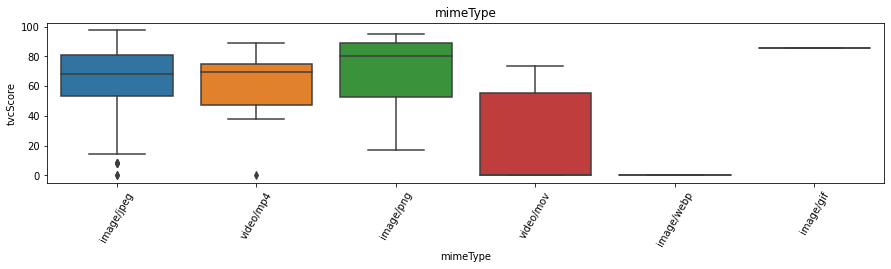

In [23]:
cat_features= ['id_asset_type_name', 'campaignId', 'mimeType']#, 'c_color', 'id_asset_type_name']
data = DF_std

plotnumber =1
for cat_f in cat_features:
    plt.figure(figsize=(15,10), facecolor='white')
    ax = plt.subplot(3,1,plotnumber)
    sns.boxplot(y = data.tvcScore, x = data[cat_f])
    plt.xlabel(cat_f)
    plt.title(cat_f) 
    plt.xticks(rotation = 60)
    plotnumber+=1
    plt.show()

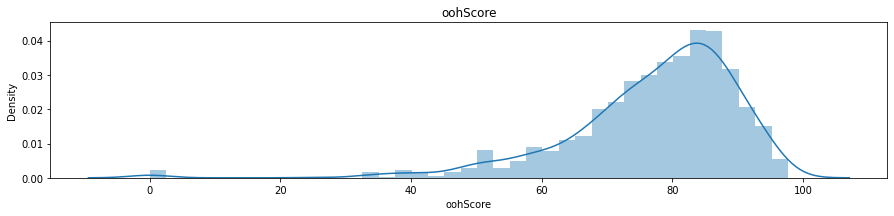

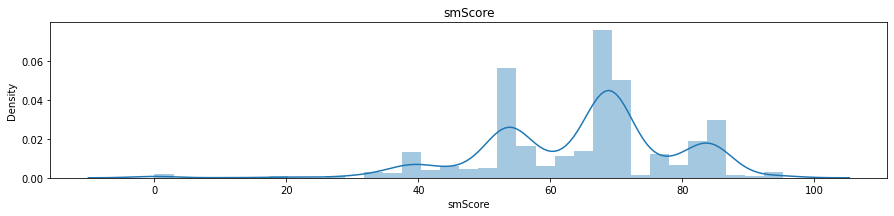

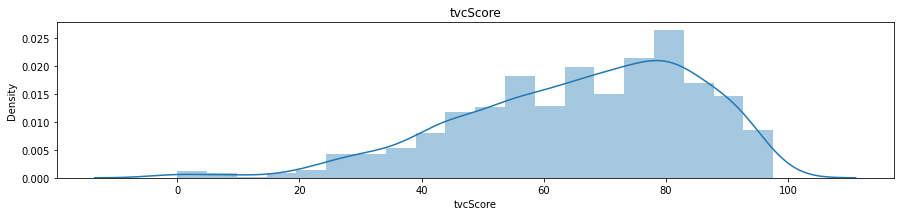

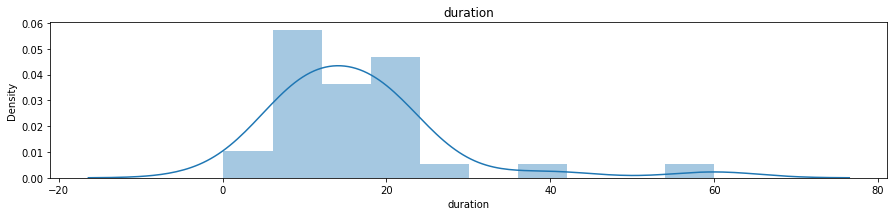

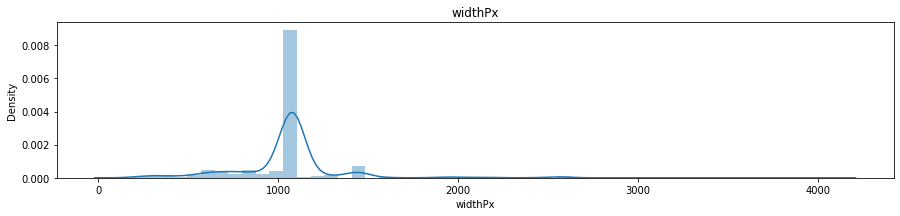

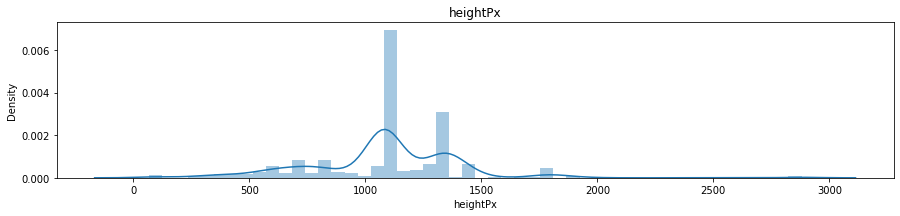

In [22]:
#sns.scatterplot(y = df.smScore.value_counts(), x = df.smScore.value_counts().index)
num_features= ['oohScore', 'smScore', 'tvcScore', 'duration', 'widthPx', 'heightPx']#, 'c_color', 'id_asset_type_name']
data = DF_std

plotnumber=1
for num_f in num_features:
    plt.figure(figsize=(15,20), facecolor='white')
    ax = plt.subplot(6,1,plotnumber)
    sns.distplot(data[num_f])
    plt.title(num_f) 
    plotnumber+=1
    plt.show()